In [1]:
import os
import sys
import itertools

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

if '..' not in sys.path: sys.path.insert(0, '..')
from common import colors

In [2]:
a, x = var('a,x')

def color_generator():
    for c in itertools.chain(*[colors.bar_indexed for x in range(10)]):
        yield c
        
def armijo_condition(f, gradient, p_k, x_k=0, c_1=0.0001, min_x=-4,  max_x=4, min_y=-4, max_y=-4):
    colors = color_generator()
    plots = []
    def myplot(f, label, var=x, min_x=min_x, max_x=max_x, **kwargs):
        plots.append(plot(f, (var,min_x,max_x), ymin=min_y, ymax=max_y, legend_label=label, color=colors.next(), **kwargs))
    myplot(f, "f(x)", thickness=2)
    l = f.subs(x=x_k) + c_1 * a * gradient.subs(x=x_k) * p_k.subs(x=x_k)
    phi = f.subs(x=x_k + a * p_k.subs(x=x_k))    
    myplot(l, "$f(x_k)+ c_1 a p_k)$", var=a, thickness=2)
    condition = phi <= l
    
    # graphing it along the y-range that I'd like to see it compresses the image width
    show(region_plot([f < l],(x, min_x, max_x), (a, min_y, max_y), incol=colors.next()))
    
    # Graphing it in a square region results in a square images
    show(region_plot([f < l],(x, min_x, max_x), (a, min_x, max_x), incol=colors.next()))

    # the two other graphs I'm trying to graph display fine by themselves.
    show(sum(plots))
    
    # As soon as I add the region_plot, it compresses the image width again.
    plots.append(region_plot([f < l],(x, min_x, max_x), (a, min_y, max_y), incol=colors.next()))
    show(sum(plots))

    

Sufficient Decrease Conditions
================

Assuming we have chosen $p_k$ as a descent direction, then the following helps us choose a step length to ensure that we are sufficiently decreasing the value at each iteration. 

Armijo condition
------------------

$f(x_k + \alpha p_k) \leq f(x_k) + c_1 \alpha \Delta f^T_k p_k$ 

where

$c_1\in (0, 1)$

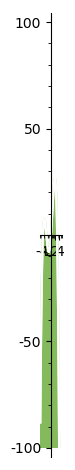

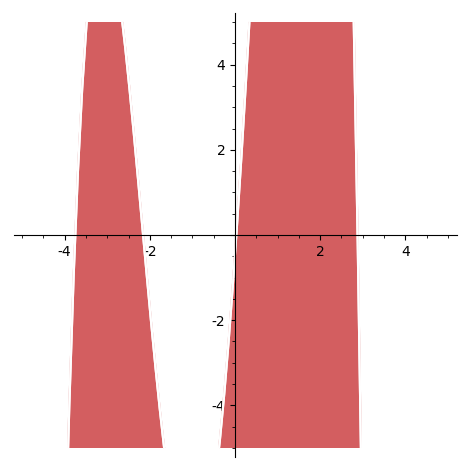

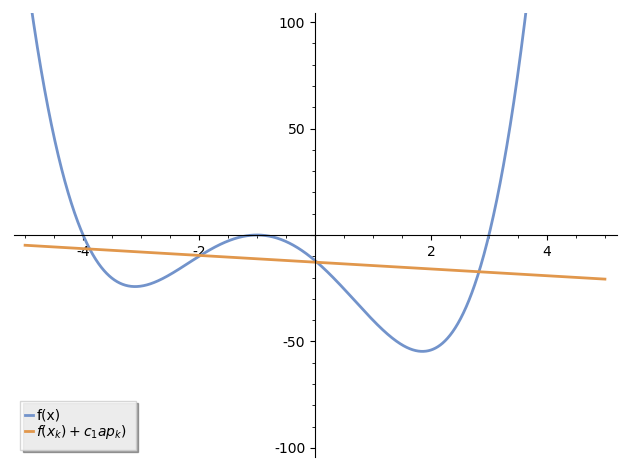

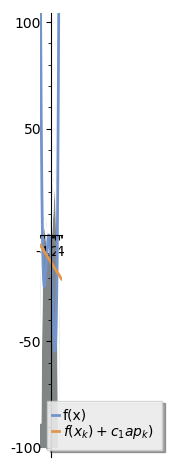

In [3]:
@interact(f=widgets.Text('x^4 + 3*x^3 - 9*x^2 - 23*x - 12 '))
def sin(f):
    x = var('x')
    f = sage_eval(f, locals={'x': x})
    gradient = f.derivative(x)
    pk = -gradient # if B^-1_k == I then px is just the - \Delta f_k
    armijo_condition(f, gradient, pk, -3.75, c_1=0.001, min_x=-5, max_x=5, min_y=-100, max_y=100)
